In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DP_train_df = pd.read_csv("Disease Prediction Training.csv")
DP_test_df = pd.read_csv("Disease Prediction Testing.csv")

# Section1: Data Preparation

## Potential data quality issue 

For some distance-based algorithms, normalization is required cause attributes in data set are in the same scale. Differece of unit impacts calculation of distance and makes it inaccurate.

To apply classification algorithms, all of the attributes should be the same type. A combination of numerical and categorical attributes is not allowed.

Missing value in the data set can also have a huge influence on the results.

Unvalidated data points. The data set contains index of normal human body, so there is normal range for these critirion. We need to do a research on them and figure out normal range and remove unvalidate data point out of the range.

## Data preprocessing

### Basic data cleaning

In [279]:
#test missing value
any(DP_train_df.isna().any())
any(DP_test_df.isna().any())
DP_train_df.dropna(inplace=True)
DP_test_df.dropna(inplace=True)
#remove duplicates()
DP_train_df.drop_duplicates(inplace=True)
DP_test_df.drop_duplicates(inplace=True)

### Data validation

In [5]:
#data validation remove outliers in Blood pressure
DP_train_df = DP_train_df[80 <= DP_train_df['High Blood Pressure']]
DP_train_df = DP_train_df[DP_train_df['High Blood Pressure'] <=200]
DP_train_df = DP_train_df[DP_train_df['Low Blood Pressure'] <=130]
DP_train_df = DP_train_df[DP_train_df['High Blood Pressure'] >= 40]

### Data converstion

Transform categorical attributes Glucose, Cholesterol, Gender into numeric by one-hot encoding.

In [275]:
#transfrom categorical attributes to numeric using one-hot encoder
#for naive bayes classifier
DP_train_df_NBC = pd.concat([DP_train_df, pd.get_dummies(DP_train_df['Gender']),
                            pd.get_dummies(DP_train_df['Glucose'], prefix='Glucose'),
                            pd.get_dummies(DP_train_df['Cholesterol'], prefix='Cholesterol')
                            ], axis = 1)
DP_train_df_NBC.drop(['Gender','Glucose','Cholesterol'], axis = 1, inplace = True)

### Data standardization

## Exploratory Data Analysis

### High Blood Pressure among different gender

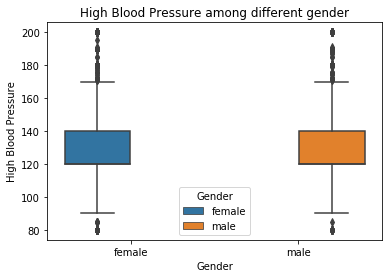

In [248]:
ax = sns.boxplot(y='High Blood Pressure', x='Gender', 
                 data=DP_train_df, hue = 'Gender')
plt.title("High Blood Pressure among different gender")
plt.show()

### Disease vs. non-disease

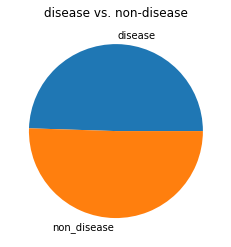

In [274]:
disease_count = DP_train_df[DP_train_df['Disease']==1].count()[0]
nondisease_count = DP_train_df[DP_train_df['Disease']==0].count()[0]
plt.figure()
plt.pie([disease_count,nondisease_count], labels=['disease','non_disease'])
plt.title("disease vs. non-disease")
plt.show()

# Section2:  Build, tune and evaluate various machine learning algorithms

## Logistic Regression

## ANN

## Deep learning

# Section3: Combination and Comparison of Multiple Machine Learning Algorithms 

## Decision Tree

# Section 4: Prediction and interpretation